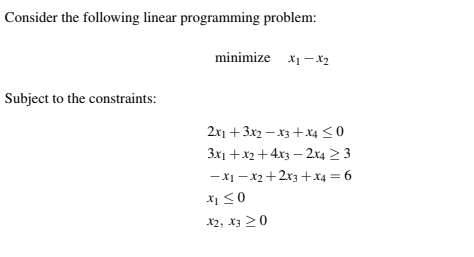

$x_4$ is URS so it can be written as:
$x_4 = x_4^{+} - x_4^{-}$; $x_4^{+},x_4^{-} \geq 0$; $x_1 = -t_1$
Therefore, we have:
$$
\begin{align}
& -2t_1 + 3x_2 - x_3 + x_4^{+} - x_4^{-} + s_1 = 0 \\
& -3t_1 + x_2 + 4x_3 - 2x_4^{+} + 2x_4^{-} - y1= 3 \\
& t_1- x_2 + 2x_3 + x_4^{+} - x_4^{-} = 6 \\
& t_1,x_2,x_3,x_4^{+},x_4^{-},s_1,y_1 \geq 0
\end{align}
$$
Finally, it can be written as:
$$
\begin{align}
\min \quad c^T x \\
\text{st} \quad & Ax=b \\  
& x \geq 0
\end{align}
$$
where,
$x = [t_1,x_2,x_3,x_4^{+},x_4^{-},s_1,y_1]^T$

A = \begin{bmatrix} -2 & 3 & -1 & 1 &-1&1&0 \\-3&1&4&-2&2&0&-1\\1&-1&2&1&-1&0&0 \end{bmatrix}

b = \begin{bmatrix} 0 \\ 3 \\ 6 \end{bmatrix}
c = \begin{bmatrix} -1 & -1 & 0 & 0 & 0 &0 & 0 \end{bmatrix}

In [1]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import shutil
import sys
import os.path
from pyomo.environ import *

import pyomo.environ as pe
import pyomo.opt as po

In [2]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [3]:
# A,b,c
A =[
    [-2, 3, -1, 1, -1, 1, 0],
    [-3, 1, 4, -2, 2, 0, -1],
    [1, -1, 2, 1, -1, 0, 0]
]
b = [0, 3, 6]
c = [-1, -1, 0, 0, 0, 0, 0]

In [4]:
n = len(c)
m = len(b)
# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(range(n), domain=NonNegativeReals)

# declare objective
model.obj = Objective(expr=sum(c[i] * model.x[i] for i in range(n)), sense=minimize)

# declare constraints
model.constraints = ConstraintList()
for i in range(m):
    model.constraints.add(sum(A[i][j] * model.x[j] for j in range(n)) == b[i])

# solve
results = SolverFactory('glpk').solve(model)
results.write()

# display solution
print('\nProfit = ', model.obj())

print('\nDecision Variables')
for i in range(n):
    print(f"x[{i}] = {model.x[i]()}")


ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x[0]
    (object: <class 'pyomo.core.base.var.VarData'>)
No value for uninitialized NumericValue object x[0]


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 7
  Number of nonzeros: 17
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0027871131896972656


ValueError: No value for uninitialized NumericValue object x[0]